In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

# 390행짜리 dong_df 만들기
## 개별 건물 데이터셋 불러오기

In [336]:
# 저장된 피클 파일 불러오기
df = pd.read_pickle("C:/ZIPcoding/dataset0222_with_line.pkl")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 57 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   접수연도          515083 non-null  int64         
 1   자치구코드         515083 non-null  object        
 2   자치구명          515083 non-null  object        
 3   법정동코드         515083 non-null  object        
 4   법정동명          515083 non-null  object        
 5   본번            515083 non-null  int64         
 6   부번            515083 non-null  int64         
 7   주소            515083 non-null  object        
 8   위도            515083 non-null  float64       
 9   경도            515083 non-null  float64       
 10  geometry      515083 non-null  object        
 11  건물명           515083 non-null  object        
 12  계약일           515083 non-null  datetime64[ns]
 13  실거래가          515083 non-null  int64         
 14  평당가격          515083 non-null  float64       
 15  건물면적          515083 n

## 유일한 동만 남기기

In [112]:
# ['자치구코드', '법정동코드', '자치구명', '법정동명']을 기준으로 그룹화하여 중복 제거
dong_df = df.groupby(['자치구코드', '법정동코드'], as_index=False).agg({
    '자치구명': 'first',
    '법정동명': 'first'
})


dong_df

,자치구코드,법정동코드,자치구명,법정동명
0,11110,10100,종로구,청운동
1,11110,10200,종로구,신교동
2,11110,10400,종로구,효자동
3,11110,10500,종로구,창성동
4,11110,10600,종로구,통의동
...,...,...,...,...
385,11740,10600,강동구,둔촌동
386,11740,10700,강동구,암사동
387,11740,10800,강동구,성내동
388,11740,10900,강동구,천호동


## 동 경계 정보 컬럼 추가

In [119]:
from dbfread import DBF

In [121]:
DBF("C:/ZIPcoding/dong_shp/LSMD_ADM_SECT_UMD_11_202502.dbf")

<unloaded DBF table 'C:/ZIPcoding/dong_shp\\LSMD_ADM_SECT_UMD_11_202502.dbf'>

In [123]:
from dbfread import DBF
import pandas as pd

# DBF 파일 경로
dbf_path = "C:/ZIPcoding/dong_shp/LSMD_ADM_SECT_UMD_11_202502.dbf"

# DBF 파일 읽기
table = DBF(dbf_path, load=True, encoding='cp949')  # cp949가 오류 나면 'utf-8', 'latin1' 등 시도

# Pandas 데이터프레임 변환
dbf = pd.DataFrame(iter(table))

# 데이터 확인
print(dbf.head())


     EMD_CD COL_ADM_SE EMD_NM  SGG_OID
0  11110103      11110    궁정동     1034
1  11110120      11110  신문로1가     1032
2  11110167      11110    충신동      375
3  11110185      11110    홍지동      374
4  11110154      11110    장사동      368


In [50]:
dbf

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID
0,11110103,11110,궁정동,1034
1,11110120,11110,신문로1가,1032
2,11110167,11110,충신동,375
3,11110185,11110,홍지동,374
4,11110154,11110,장사동,368
...,...,...,...,...
462,11740108,11740,성내동,354
463,11740105,11740,길동,355
464,11740110,11740,강일동,377
465,11740101,11740,명일동,361


In [42]:
dong_df[dong_df['법정동명'] == '신문로1가']

,자치구코드,법정동코드,자치구명,법정동명
15,11110,12000,종로구,신문로1가


     EMD_CD COL_ADM_SE     EMD_NM  SGG_OID  \
0  11110103      11110     ±ÃÁ¤µ¿     1034   
1  11110120      11110  ½Å¹®·Î1°¡     1032   
2  11110167      11110     Ãæ½Åµ¿      375   
3  11110185      11110     È«Áöµ¿      374   
4  11110154      11110     Àå»çµ¿      368   

                                            geometry  
0  POLYGON ((197377.94 553847.089, 197388.365 553...  
1  POLYGON ((197513.143 552250.913, 197519.052 55...  
2  POLYGON ((200756.029 553021.646, 200757.04 553...  
3  POLYGON ((195937.08 556131.319, 195941.823 556...  
4  POLYGON ((199319.607 552274.718, 199334.592 55...  


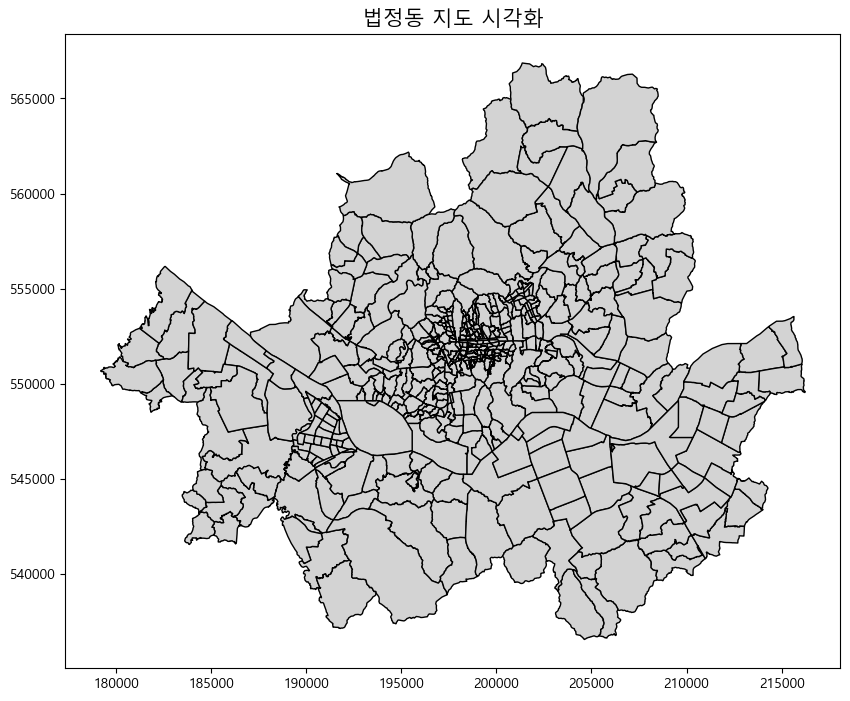

In [126]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Shapefile 파일 경로
shp_path = "C:/ZIPcoding/dong_shp/LSMD_ADM_SECT_UMD_11_202502.shp"

# Shapefile 불러오기
gdf = gpd.read_file(shp_path)

# 데이터 확인
print(gdf.head())

# 지도 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', facecolor='lightgray')

# 제목 추가
plt.title("법정동 지도 시각화", fontsize=15)
plt.show()


In [130]:
having = dbf[dbf['EMD_NM'].apply(lambda x : x in dong_df['법정동명'].unique())]

In [132]:
having

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID
1,11110120,11110,신문로1가,1032
2,11110167,11110,충신동,375
3,11110185,11110,홍지동,374
5,11110135,11110,관철동,367
6,11110177,11110,평동,366
...,...,...,...,...
462,11740108,11740,성내동,354
463,11740105,11740,길동,355
464,11740110,11740,강일동,377
465,11740101,11740,명일동,361


In [134]:

having_gdf = gdf[gdf['EMD_CD'].apply(lambda x : x in having['EMD_CD'].unique())]

In [136]:
having_gdf

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
1,11110120,11110,½Å¹®·Î1°¡,1032,"POLYGON ((197513.143 552250.913, 197519.052 55..."
2,11110167,11110,Ãæ½Åµ¿,375,"POLYGON ((200756.029 553021.646, 200757.04 553..."
3,11110185,11110,È«Áöµ¿,374,"POLYGON ((195937.08 556131.319, 195941.823 556..."
5,11110135,11110,°üÃ¶µ¿,367,"POLYGON ((198508.219 552305.179, 198509.165 55..."
6,11110177,11110,Æòµ¿,366,"POLYGON ((197047.66 552220.704, 197051.4 55221..."
...,...,...,...,...,...
462,11740108,11740,¼º³»µ¿,354,"POLYGON ((210911.684 548880.836, 210930.895 54..."
463,11740105,11740,±æµ¿,355,"POLYGON ((213293.684 549583.786, 213310.499 54..."
464,11740110,11740,°­ÀÏµ¿,377,"POLYGON ((214310.912 552994.432, 214359.282 55..."
465,11740101,11740,¸íÀÏµ¿,361,"POLYGON ((212785.854 550691.093, 212776.265 55..."


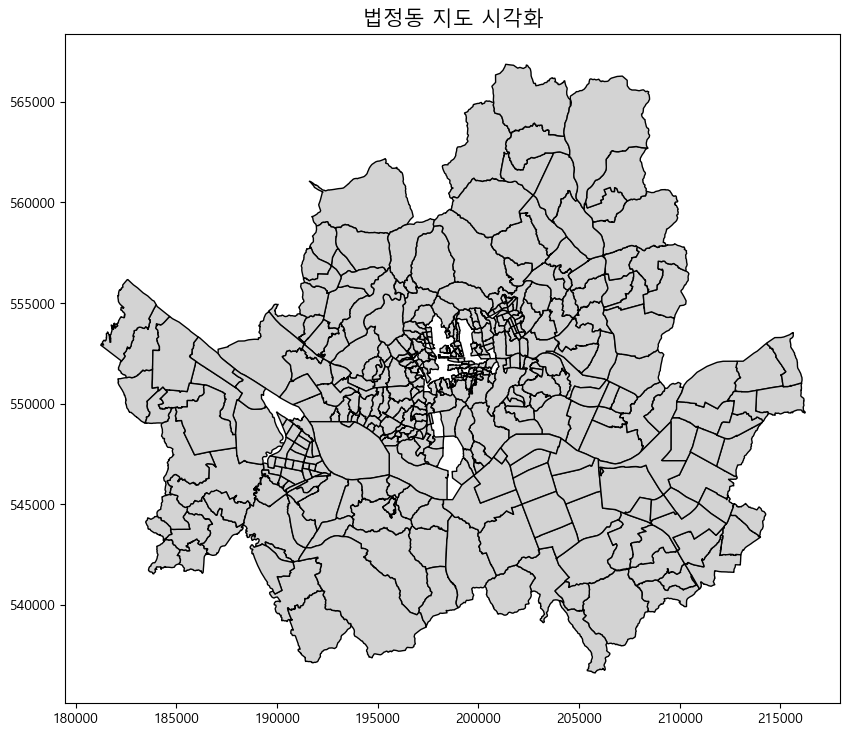

In [72]:

# 지도 시각화
fig, ax = plt.subplots(figsize=(10, 10))
having_gdf.plot(ax=ax, edgecolor='black', facecolor='lightgray')

# 제목 추가
plt.title("법정동 지도 시각화", fontsize=15)
plt.show()


#### -> 2020년부터 한 건도 거래 없었던 동의 정보는 데이터셋에 포함 X 

In [76]:
having

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID
1,11110120,11110,신문로1가,1032
2,11110167,11110,충신동,375
3,11110185,11110,홍지동,374
5,11110135,11110,관철동,367
6,11110177,11110,평동,366
...,...,...,...,...
462,11740108,11740,성내동,354
463,11740105,11740,길동,355
464,11740110,11740,강일동,377
465,11740101,11740,명일동,361


In [74]:
having_gdf

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
1,11110120,11110,½Å¹®·Î1°¡,1032,"POLYGON ((197513.143 552250.913, 197519.052 55..."
2,11110167,11110,Ãæ½Åµ¿,375,"POLYGON ((200756.029 553021.646, 200757.04 553..."
3,11110185,11110,È«Áöµ¿,374,"POLYGON ((195937.08 556131.319, 195941.823 556..."
5,11110135,11110,°üÃ¶µ¿,367,"POLYGON ((198508.219 552305.179, 198509.165 55..."
6,11110177,11110,Æòµ¿,366,"POLYGON ((197047.66 552220.704, 197051.4 55221..."
...,...,...,...,...,...
462,11740108,11740,¼º³»µ¿,354,"POLYGON ((210911.684 548880.836, 210930.895 54..."
463,11740105,11740,±æµ¿,355,"POLYGON ((213293.684 549583.786, 213310.499 54..."
464,11740110,11740,°­ÀÏµ¿,377,"POLYGON ((214310.912 552994.432, 214359.282 55..."
465,11740101,11740,¸íÀÏµ¿,361,"POLYGON ((212785.854 550691.093, 212776.265 55..."


In [138]:
having = pd.merge(having, having_gdf, on = 'EMD_CD', how = 'left')
having

,EMD_CD,COL_ADM_SE_x,EMD_NM_x,SGG_OID_x,COL_ADM_SE_y,EMD_NM_y,SGG_OID_y,geometry
0,11110120,11110,신문로1가,1032,11110,½Å¹®·Î1°¡,1032,"POLYGON ((197513.143 552250.913, 197519.052 55..."
1,11110167,11110,충신동,375,11110,Ãæ½Åµ¿,375,"POLYGON ((200756.029 553021.646, 200757.04 553..."
2,11110185,11110,홍지동,374,11110,È«Áöµ¿,374,"POLYGON ((195937.08 556131.319, 195941.823 556..."
3,11110135,11110,관철동,367,11110,°üÃ¶µ¿,367,"POLYGON ((198508.219 552305.179, 198509.165 55..."
4,11110177,11110,평동,366,11110,Æòµ¿,366,"POLYGON ((197047.66 552220.704, 197051.4 55221..."
...,...,...,...,...,...,...,...,...
385,11740108,11740,성내동,354,11740,¼º³»µ¿,354,"POLYGON ((210911.684 548880.836, 210930.895 54..."
386,11740105,11740,길동,355,11740,±æµ¿,355,"POLYGON ((213293.684 549583.786, 213310.499 54..."
387,11740110,11740,강일동,377,11740,°­ÀÏµ¿,377,"POLYGON ((214310.912 552994.432, 214359.282 55..."
388,11740101,11740,명일동,361,11740,¸íÀÏµ¿,361,"POLYGON ((212785.854 550691.093, 212776.265 55..."


In [140]:
having = having.iloc[:, [1, 2,7]]

In [142]:
having

,COL_ADM_SE_x,EMD_NM_x,geometry
0,11110,신문로1가,"POLYGON ((197513.143 552250.913, 197519.052 55..."
1,11110,충신동,"POLYGON ((200756.029 553021.646, 200757.04 553..."
2,11110,홍지동,"POLYGON ((195937.08 556131.319, 195941.823 556..."
3,11110,관철동,"POLYGON ((198508.219 552305.179, 198509.165 55..."
4,11110,평동,"POLYGON ((197047.66 552220.704, 197051.4 55221..."
...,...,...,...
385,11740,성내동,"POLYGON ((210911.684 548880.836, 210930.895 54..."
386,11740,길동,"POLYGON ((213293.684 549583.786, 213310.499 54..."
387,11740,강일동,"POLYGON ((214310.912 552994.432, 214359.282 55..."
388,11740,명일동,"POLYGON ((212785.854 550691.093, 212776.265 55..."


In [144]:
having.columns = ['자치구코드', '법정동명', 'geometry']

In [154]:
pd.merge(dong_df, having, on = ['자치구코드', '법정동명'])

,자치구코드,법정동코드,자치구명,법정동명,geometry


In [172]:
having.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   자치구코드     390 non-null    object  
 1   법정동명      390 non-null    object  
 2   geometry  390 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 9.3+ KB


In [174]:
having['자치구코드'] = having['자치구코드'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_15372\170419058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  having['자치구코드'] = having['자치구코드'].astype(int)


In [178]:
dong_df = pd.merge(dong_df, having, on = ['자치구코드', '법정동명'], how='left')

In [180]:
dong_df

,자치구코드,법정동코드,자치구명,법정동명,geometry
0,11110,10100,종로구,청운동,"POLYGON ((196593.78 554114.404, 196611.348 554..."
1,11110,10200,종로구,신교동,"POLYGON ((196912.519 554003.639, 196920.994 55..."
2,11110,10400,종로구,효자동,"POLYGON ((197664.984 553742.359, 197663.831 55..."
3,11110,10500,종로구,창성동,"POLYGON ((197662.104 553585.879, 197662.507 55..."
4,11110,10600,종로구,통의동,"POLYGON ((197694.155 553307.822, 197694.357 55..."
...,...,...,...,...,...
385,11740,10600,강동구,둔촌동,"POLYGON ((211833.973 546891.369, 211867.821 54..."
386,11740,10700,강동구,암사동,"POLYGON ((212861.71 552109.103, 212861.909 552..."
387,11740,10800,강동구,성내동,"POLYGON ((210911.684 548880.836, 210930.895 54..."
388,11740,10900,강동구,천호동,"POLYGON ((212507.555 550151.833, 212510.555 55..."


In [224]:
dong_df['전체코드']  = dong_df['자치구코드'].apply(lambda x : str(x)) + dong_df['법정동코드'].apply(lambda x : str(x))

In [188]:
dong_df['자치구법정동'] = dong_df['자치구명'] + ' ' + dong_df['법정동명']

In [228]:
dong_df.to_pickle('C:/ZIPcoding/dong_df.pkl')

In [230]:
dong_df.head()

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,geometry
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,"POLYGON ((196593.78 554114.404, 196611.348 554..."
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,"POLYGON ((196912.519 554003.639, 196920.994 55..."
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,"POLYGON ((197664.984 553742.359, 197663.831 55..."
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,"POLYGON ((197662.104 553585.879, 197662.507 55..."
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,"POLYGON ((197694.155 553307.822, 197694.357 55..."


In [7]:
dong_df = pd.read_pickle('C:/ZIPcoding/dong_df.pkl')

In [23]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,geometry
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,"POLYGON ((196593.78 554114.404, 196611.348 554..."
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,"POLYGON ((196912.519 554003.639, 196920.994 55..."
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,"POLYGON ((197664.984 553742.359, 197663.831 55..."
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,"POLYGON ((197662.104 553585.879, 197662.507 55..."
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,"POLYGON ((197694.155 553307.822, 197694.357 55..."
...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,"POLYGON ((211833.973 546891.369, 211867.821 54..."
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,"POLYGON ((212861.71 552109.103, 212861.909 552..."
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,"POLYGON ((210911.684 548880.836, 210930.895 54..."
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,"POLYGON ((212507.555 550151.833, 212510.555 55..."


## 서울5대학군지여부 컬럼 추가

In [25]:
학군지 = pd.read_csv("C:/ZIPcoding/서울5대학군지.csv")

In [41]:
dong_df = pd.merge(dong_df, 학군지, on = ['자치구명', '법정동명'], how ='left')

In [45]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,geometry,서울5대학군지여부
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,"POLYGON ((196593.78 554114.404, 196611.348 554...",NaN
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,"POLYGON ((196912.519 554003.639, 196920.994 55...",NaN
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,"POLYGON ((197664.984 553742.359, 197663.831 55...",NaN
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,"POLYGON ((197662.104 553585.879, 197662.507 55...",NaN
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,"POLYGON ((197694.155 553307.822, 197694.357 55...",NaN
...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,"POLYGON ((211833.973 546891.369, 211867.821 54...",NaN
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,"POLYGON ((212861.71 552109.103, 212861.909 552...",NaN
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,"POLYGON ((210911.684 548880.836, 210930.895 54...",NaN
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,"POLYGON ((212507.555 550151.833, 212510.555 55...",NaN


In [47]:
dong_df['서울5대학군지여부'].fillna(0, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_21292\3345348311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dong_df['서울5대학군지여부'].fillna(0, inplace = True)


In [61]:
set(dong_df[dong_df['서울5대학군지여부']==1]['법정동명']) - set(학군지['법정동명'])

set()

In [63]:
set(학군지['법정동명']) - set(dong_df[dong_df['서울5대학군지여부']==1]['법정동명'])

{'원지동'}

In [73]:
dong_df['서울5대학군지여부'] = dong_df['서울5대학군지여부'].astype(int)

In [77]:
dong_df.head()

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,geometry,서울5대학군지여부
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,"POLYGON ((196593.78 554114.404, 196611.348 554...",0
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,"POLYGON ((196912.519 554003.639, 196920.994 55...",0
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,"POLYGON ((197664.984 553742.359, 197663.831 55...",0
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,"POLYGON ((197662.104 553585.879, 197662.507 55...",0
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,"POLYGON ((197694.155 553307.822, 197694.357 55...",0


## 포함지하철역 컬럼 만들기

In [83]:

subway = pd.read_csv("C:/ZIPcoding/subway0222.csv")

In [85]:
subway

,Unnamed: 0,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,0,0529,공덕,S1105,5호선,Gongdeok,孔德,도시철도 환승역,S1106,수도권 도시철도 6호선,37.544431,126.951372,서울교통공사,서울특별시 마포구 마포대로 지하100(공덕동),02-6311-5291,2024-12-31 00:00:00
1,1,1014,청량리,I41K4,경의중앙선,Cheongnyangni,淸凉里,환승역,"S1101, I41K2, I4105","1호선, 경춘선, 분당선",37.580543,127.046516,한국철도공사,서울시 동대문구 왕산로 214,1544-7788,2024-12-31 00:00:00
2,2,1015,회기,I4102,경원선,Hoegi,回 基,환승역,"I41K4, I41K2","경의중앙선, 경춘선",37.589802,127.057936,한국철도공사,서울시 동대문구 회기로196(휘경동 317-101),1544-7788,2024-12-31 00:00:00
3,3,0205,동대문역사문화공원,S1102,2호선,Dongdaemun History & Culture Park,東大門歷史文化公園(DDP),도시철도 환승역,I1104+S1105,수도권 광역철도 4호선+수도권 도시철도 5호선,37.565613,127.005353,서울교통공사,서울특별시 중구 을지로 지하279(을지로7가),02-6110-2051,2024-12-31 00:00:00
4,4,0512,김포공항,S1105,5호선,Gimpo Int'l Airport,金浦空港,도시철도 환승역,S11S1+I28A1+L41G1+I41WS,수도권 도시철도 9호선+수도권 광역철도 공항+김포도시철도+서해선,37.562384,126.801292,서울교통공사,서울특별시 강서구 하늘길 지하77(방화동),02-6311-5121,2024-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,331,S115,삼양,L11UI,우이신설선,Samyang,三陽,도시철도 일반역,NaN,NaN,37.626914,127.018106,우이신설경전철운영㈜,서울특별시 강북구 삼양로 지하 259,-,2022-05-25 00:00:00
303,332,S116,삼양사거리,L11UI,우이신설선,Samyang Sageori,三陽四―驛,도시철도 일반역,NaN,NaN,37.621497,127.019719,우이신설경전철운영㈜,서울특별시 강북구 삼양로 197,-,2022-05-25 00:00:00
304,333,S117,솔샘,L11UI,우이신설선,Solsaem,松泉,도시철도 일반역,NaN,NaN,37.620238,127.013626,우이신설경전철운영㈜,서울특별시 강북구 솔샘로 지하 189,-,2022-05-25 00:00:00
305,334,S118,북한산보국문,L11UI,우이신설선,Bukhansan Bogungmun,北漢山輔國門,도시철도 일반역,NaN,NaN,37.618140,126.997969,우이신설경전철운영㈜,서울특별시 성북구 보국문로 지하 88,-,2022-05-25 00:00:00


In [99]:
dong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   자치구코드      390 non-null    int32   
 1   법정동코드      390 non-null    int32   
 2   전체코드       390 non-null    object  
 3   자치구명       390 non-null    object  
 4   법정동명       390 non-null    object  
 5   자치구법정동     390 non-null    object  
 6   geometry   390 non-null    geometry
 7   서울5대학군지여부  390 non-null    int32   
dtypes: geometry(1), int32(3), object(4)
memory usage: 19.9+ KB


In [105]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  307 non-null    int64  
 1   역번호         307 non-null    object 
 2   역사명         307 non-null    object 
 3   노선번호        307 non-null    object 
 4   노선명         307 non-null    object 
 5   영문역사명       307 non-null    object 
 6   한자역사명       307 non-null    object 
 7   환승역구분       307 non-null    object 
 8   환승노선번호      73 non-null     object 
 9   환승노선명       74 non-null     object 
 10  역위도         307 non-null    float64
 11  역경도         307 non-null    float64
 12  운영기관명       307 non-null    object 
 13  역사도로명주소     307 non-null    object 
 14  역사전화번호      298 non-null    object 
 15  데이터기준일자     298 non-null    object 
 16  역위치         307 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 40.9+ KB


In [147]:
type(dong_df)

geopandas.geodataframe.GeoDataFrame

In [272]:
import requests
import pandas as pd

# 🚀 1. API 기본 정보 설정
API_KEY = "	devU01TX0FVVEgyMDI1MDIyMzIwNTM1NTExNTQ5NTA="  # 공공데이터포털에서 발급받은 API 키를 입력하세요.
API_URL = "https://business.juso.go.kr/addrlink/addrLinkApi.do"

# 🚀 2. 변환 함수 정의
def convert_road_to_jibun(road_address):
    """ 도로명주소를 지번주소로 변환하는 함수 """
    params = {
        "confmKey": API_KEY,
        "currentPage": 1,
        "countPerPage": 1,
        "keyword": road_address,
        "resultType": "json"
    }
    
    response = requests.get(API_URL, params=params)
    data = response.json()
    
    if "results" in data and "juso" in data["results"]:
        try:
            return data["results"]["juso"][0]["jibunAddr"]  # 변환된 지번주소 반환
        except IndexError:
            return None  # 변환 실패 시 None 반환
    return None  # API 오류 시 None 반환

# 🚀 3. 데이터프레임 적용 (예제: dong_df['도로명주소'] → 지번주소 추가)
subway['지번주소'] = subway['역사도로명주소'].apply(lambda x: convert_road_to_jibun(x) if pd.notna(x) else None)



In [280]:
subway[subway['지번주소'].isna()]

,Unnamed: 0,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자,역위치,지번주소
225,230,0809,암사역사공원,S1108,8호선,Amsa History Park,岩寺歷史公園,도시철도 일반역,NaN,NaN,37.556950,127.137020,서울교통공사,서울시 강동구 아리수로 27번길 2,02-6311-8091,2024-12-31 00:00:00,POINT (127.13702 37.55695),None
282,310,4131,삼전,S1109,수도권 도시철도 9호선,Samjeon,三田,도시철도 일반역,NaN,NaN,37.504738,127.088025,서울시메트로9호선㈜,서울특별시 송파구 백제고분로 지하 187,NaN,NaN,POINT (127.088025 37.504738),None
283,311,4132,석촌고분,S1109,수도권 도시철도 9호선,Seokchon Gobun,石村古坟,도시철도 일반역,NaN,NaN,37.502558,127.097033,서울시메트로9호선㈜,서울특별시 송파구 삼학사로 지하 53,NaN,NaN,POINT (127.097033 37.502558),None
285,313,4135,한성백제,S1109,수도권 도시철도 9호선,Hanseong Baekje,汉城百济,도시철도 일반역,NaN,NaN,37.516404,127.116503,서울시메트로9호선㈜,서울특별시 송파구 위례성대로 지하 51,NaN,NaN,POINT (127.116503 37.516404),None
286,314,4137,둔촌오륜,S1109,수도권 도시철도 9호선,Dunchon Oryun,遁村五轮,도시철도 일반역,NaN,NaN,37.519683,127.137989,서울시메트로9호선㈜,서울특별시 강동구 강동대로 지하 327,NaN,NaN,POINT (127.137989 37.519683),None
287,315,4138,중앙보훈병원,S1109,수도권 도시철도 9호선,VHS Medical Center,中央报勋医院,도시철도 일반역,NaN,NaN,37.529191,127.148739,서울시메트로9호선㈜,서울특별시 강동구 명일로 지하 117,NaN,NaN,POINT (127.148739 37.529191),None


In [282]:
# ✅ API로 변환되지 않은 지하철역의 지번주소를 수동으로 추가
missing_jibun = {
    "암사역사공원": "서울특별시 강동구 암사동 513-5",
    "삼전": "서울특별시 송파구 잠실동 347",
    "석촌고분": "서울특별시 송파구 석촌동 157",
    "한성백제": "서울특별시 송파구 방이동 88-17",
    "둔촌오륜": "서울특별시 강동구 방이동 89-29",
    "중앙보훈병원": "서울특별시 강동구 둔촌동 6-3"
}

# ✅ subway 데이터에 수동으로 입력
for idx, row in subway.iterrows():
    if row["역사명"] in missing_jibun:
        subway.at[idx, "지번주소"] = missing_jibun[row["역사명"]]


In [286]:
subway['법정동'] = subway['지번주소'].apply(lambda x : x.split()[2])

In [290]:
subway_dong = subway[['역사명', '법정동']]

In [298]:
dong_df = dong_df.iloc[:,:8]

In [300]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((126.96143 37.58658, 126.96163 37.586..."
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((126.96504 37.58559, 126.96514 37.585..."
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((126.9739 37.57932, 126.9739 37.57929..."
...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((127.13387 37.52143, 127.13425 37.522..."
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((127.14559 37.56843, 127.14559 37.567..."
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((127.12346 37.53937, 127.12368 37.539..."
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((127.14154 37.5508, 127.14158 37.5508..."


In [302]:
subway_dong

,역사명,법정동
0,공덕,공덕동
1,청량리,전농동
2,회기,휘경동
3,동대문역사문화공원,을지로7가
4,김포공항,방화동
...,...,...
302,삼양,미아동
303,삼양사거리,미아동
304,솔샘,미아동
305,북한산보국문,정릉동


In [304]:

# 초기화: 포함지하철역 컬럼 추가 (빈 리스트)
dong_df['포함지하철역'] = [[] for _ in range(len(dong_df))]

# subway_dong의 법정동을 기준으로 역을 그룹화하여 딕셔너리 생성
subway_dict = subway_dong.groupby('법정동')['역사명'].apply(list).to_dict()

# dong_df에 포함된 지하철역 리스트 추가
dong_df['포함지하철역'] = dong_df['법정동명'].map(subway_dict).apply(lambda x: x if isinstance(x, list) else [])

In [308]:
dong_df['포함지하철역']

0                 []
1                 []
2                 []
3                 []
4                 []
           ...      
385    [둔촌동, 중앙보훈병원]
386     [암사역사공원, 암사]
387           [강동구청]
388         [천호, 강동]
389               []
Name: 포함지하철역, Length: 390, dtype: object

## 환승역개수, 일반역개수 컬럼 생성

In [314]:
import pandas as pd

# 새로운 컬럼 추가를 위한 초기화
dong_df['환승역개수'] = 0
dong_df['일반역개수'] = 0

# 지하철 노선 목록 (subway 데이터에서 가져온 노선명 기반)
subway_lines = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', 
                '경의중앙선', '경춘선', '공항철도', '수인분당선', '신분당선', '우이신설선', '신림선', 'GTX-A']

# 각 노선 개수 컬럼 초기화
for line in subway_lines:
    dong_df[f'{line}개수'] = 0

# 포함된 지하철역을 기반으로 데이터 추가
for idx, row in dong_df.iterrows():
    included_stations = row['포함지하철역']  # 포함된 지하철역 리스트
    
    if not included_stations:
        continue  # 포함된 역이 없으면 건너뜀

    # 포함된 역들의 정보를 subway 데이터에서 가져옴
    station_info = subway[subway['역사명'].isin(included_stations)]

    # 환승역 개수 및 일반역 개수 계산
    dong_df.at[idx, '환승역개수'] = station_info[station_info['환승역구분'] != '일반역'].shape[0]  # 환승역
    dong_df.at[idx, '일반역개수'] = station_info[station_info['환승역구분'] == '일반역'].shape[0]  # 일반역

    # 각 노선별 개수 계산
    for line in subway_lines:
        dong_df.at[idx, f'{line}개수'] = station_info[station_info['노선명'].str.contains(line, na=False)].shape[0]


In [316]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,8호선개수,9호선개수,경의중앙선개수,경춘선개수,공항철도개수,수인분당선개수,신분당선개수,우이신설선개수,신림선개수,GTX-A개수
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((126.96143 37.58658, 126.96163 37.586...",[],0,...,0,0,0,0,0,0,0,0,0,0
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((126.96504 37.58559, 126.96514 37.585...",[],0,...,0,0,0,0,0,0,0,0,0,0
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((126.97356 37.58323, 126.97355 37.582...",[],0,...,0,0,0,0,0,0,0,0,0,0
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((126.97353 37.58182, 126.97354 37.581...",[],0,...,0,0,0,0,0,0,0,0,0,0
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((126.9739 37.57932, 126.9739 37.57929...",[],0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((127.13387 37.52143, 127.13425 37.522...","[둔촌동, 중앙보훈병원]",2,...,0,1,0,0,0,0,0,0,0,0
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((127.14559 37.56843, 127.14559 37.567...","[암사역사공원, 암사]",2,...,2,0,0,0,0,0,0,0,0,0
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((127.12346 37.53937, 127.12368 37.539...",[강동구청],1,...,1,0,0,0,0,0,0,0,0,0
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((127.14154 37.5508, 127.14158 37.5508...","[천호, 강동]",2,...,0,0,0,0,0,0,0,0,0,0


In [318]:
# dong_df.to_pickle('C:/ZIPcoding/dong_df.pkl')

In [320]:
type(dong_df)

geopandas.geodataframe.GeoDataFrame

In [322]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,8호선개수,9호선개수,경의중앙선개수,경춘선개수,공항철도개수,수인분당선개수,신분당선개수,우이신설선개수,신림선개수,GTX-A개수
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((126.96143 37.58658, 126.96163 37.586...",[],0,...,0,0,0,0,0,0,0,0,0,0
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((126.96504 37.58559, 126.96514 37.585...",[],0,...,0,0,0,0,0,0,0,0,0,0
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((126.97356 37.58323, 126.97355 37.582...",[],0,...,0,0,0,0,0,0,0,0,0,0
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((126.97353 37.58182, 126.97354 37.581...",[],0,...,0,0,0,0,0,0,0,0,0,0
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((126.9739 37.57932, 126.9739 37.57929...",[],0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((127.13387 37.52143, 127.13425 37.522...","[둔촌동, 중앙보훈병원]",2,...,0,1,0,0,0,0,0,0,0,0
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((127.14559 37.56843, 127.14559 37.567...","[암사역사공원, 암사]",2,...,2,0,0,0,0,0,0,0,0,0
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((127.12346 37.53937, 127.12368 37.539...",[강동구청],1,...,1,0,0,0,0,0,0,0,0,0
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((127.14154 37.5508, 127.14158 37.5508...","[천호, 강동]",2,...,0,0,0,0,0,0,0,0,0,0


## 한강변 여부 컬럼 추가

In [326]:
import geopandas as gpd

# 한강변 데이터 불러오기
shapefile_path = "C:/ZIPcoding/original_data/hangang/LSMD_CONT_UM730_5174_11_202501.shp"
hangang_gdf = gpd.read_file(shapefile_path)

# 좌표계 맞추기 (한강변 데이터가 EPSG:5174라면 dong_df도 변환 필요)
if hangang_gdf.crs is None:
    hangang_gdf.set_crs(epsg=5174, inplace=True)
    
if dong_df.crs is None or dong_df.crs != hangang_gdf.crs:
    dong_df = dong_df.to_crs(hangang_gdf.crs)

# 한강변 전체를 하나의 큰 폴리곤으로 합치기
hangang_union = hangang_gdf.geometry.unary_union

# 한강변 여부 판별 함수
def check_hangang_status(dong_geom):
    """법정동이 한강변에 포함되었는지(1) 아닌지(0) 판별"""
    # 법정동이 한강변 내부에 완전히 포함되면 1
    if dong_geom.within(hangang_union):
        return 1
    
    # 법정동이 한강변과 일부라도 겹치면 겹치는 비율 계산
    if dong_geom.intersects(hangang_union):
        intersection = dong_geom.intersection(hangang_union)
        overlap_ratio = intersection.area / dong_geom.area
        
        # 50% 이상 겹치면 한강변으로 판단
        if overlap_ratio >= 0.5:
            return 1
    
    # 한강변과 전혀 겹치지 않으면 0
    return 0

# 한강변 여부 컬럼 추가
dong_df['한강변여부'] = dong_df['geometry'].apply(check_hangang_status)


C:\Users\user\AppData\Local\Temp\ipykernel_21292\872906379.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hangang_union = hangang_gdf.geometry.unary_union


In [328]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,9호선개수,경의중앙선개수,경춘선개수,공항철도개수,수인분당선개수,신분당선개수,우이신설선개수,신림선개수,GTX-A개수,한강변여부
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,0,0,0,0,0,0,0,0,0,0
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((196842.923 453698.495, 196851.398 45...",[],0,...,0,0,0,0,0,0,0,0,0,0
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((197595.39 453437.201, 197594.236 453...",[],0,...,0,0,0,0,0,0,0,0,0,0
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((197592.507 453280.719, 197592.91 453...",[],0,...,0,0,0,0,0,0,0,0,0,0
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((197624.554 453002.66, 197624.756 452...",[],0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((211764.383 446585.925, 211798.233 44...","[둔촌동, 중앙보훈병원]",2,...,1,0,0,0,0,0,0,0,0,0
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((212792.213 451803.685, 212792.411 45...","[암사역사공원, 암사]",2,...,0,0,0,0,0,0,0,0,0,1
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((210842.119 448575.423, 210861.33 448...",[강동구청],1,...,0,0,0,0,0,0,0,0,0,0
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((212438.023 449846.405, 212441.023 44...","[천호, 강동]",2,...,0,0,0,0,0,0,0,0,0,1


In [330]:
# dong_df.to_pickle('C:/ZIPcoding/dong_df.pkl')

In [334]:
dong_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   자치구코드      390 non-null    object  
 1   법정동코드      390 non-null    int32   
 2   전체코드       390 non-null    object  
 3   자치구명       390 non-null    object  
 4   법정동명       390 non-null    object  
 5   자치구법정동     390 non-null    object  
 6   서울5대학군지여부  390 non-null    int32   
 7   geometry   390 non-null    geometry
 8   포함지하철역     390 non-null    object  
 9   환승역개수      390 non-null    int64   
 10  일반역개수      390 non-null    int64   
 11  1호선개수      390 non-null    int64   
 12  2호선개수      390 non-null    int64   
 13  3호선개수      390 non-null    int64   
 14  4호선개수      390 non-null    int64   
 15  5호선개수      390 non-null    int64   
 16  6호선개수      390 non-null    int64   
 17  7호선개수      390 non-null    int64   
 18  8호선개수      390 non-null    int64   
 19  9호선개수      390 non-nu

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 57 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   접수연도          515083 non-null  int64         
 1   자치구코드         515083 non-null  object        
 2   자치구명          515083 non-null  object        
 3   법정동코드         515083 non-null  object        
 4   법정동명          515083 non-null  object        
 5   본번            515083 non-null  int64         
 6   부번            515083 non-null  int64         
 7   주소            515083 non-null  object        
 8   위도            515083 non-null  float64       
 9   경도            515083 non-null  float64       
 10  geometry      515083 non-null  object        
 11  건물명           515083 non-null  object        
 12  계약일           515083 non-null  datetime64[ns]
 13  실거래가          515083 non-null  int64         
 14  평당가격          515083 non-null  float64       
 15  건물면적          515083 n

In [346]:
# dong_df.to_pickle('C:/ZIPcoding/dong_df.pkl')

In [358]:
dong_df = pd.read_pickle('C:/ZIPcoding/dong_df.pkl')

In [360]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,9호선개수,경의중앙선개수,경춘선개수,공항철도개수,수인분당선개수,신분당선개수,우이신설선개수,신림선개수,GTX-A개수,한강변여부
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,0,0,0,0,0,0,0,0,0,0
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((196842.923 453698.495, 196851.398 45...",[],0,...,0,0,0,0,0,0,0,0,0,0
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((197595.39 453437.201, 197594.236 453...",[],0,...,0,0,0,0,0,0,0,0,0,0
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((197592.507 453280.719, 197592.91 453...",[],0,...,0,0,0,0,0,0,0,0,0,0
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((197624.554 453002.66, 197624.756 452...",[],0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((211764.383 446585.925, 211798.233 44...","[둔촌동, 중앙보훈병원]",2,...,1,0,0,0,0,0,0,0,0,0
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((212792.213 451803.685, 212792.411 45...","[암사역사공원, 암사]",2,...,0,0,0,0,0,0,0,0,0,1
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((210842.119 448575.423, 210861.33 448...",[강동구청],1,...,0,0,0,0,0,0,0,0,0,0
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((212438.023 449846.405, 212441.023 44...","[천호, 강동]",2,...,0,0,0,0,0,0,0,0,0,1


In [352]:
dong_df['자치구코드'] = dong_df['자치구코드'].astype(int)

In [362]:
df

,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,...,공항철도_여부,6호선_여부,경부선_여부,경춘선_여부,신분당선_여부,수인분당선_여부,8호선_여부,5호선_여부,4호선_여부,GTX-A_여부
0,2020,11290,성북구,13600,하월곡동,222,0,서울특별시 성북구 하월곡동 222,37.607033,127.038366,...,0,1,0,0,0,0,0,0,0,0
1,2020,11380,은평구,10400,갈현동,432,7,서울특별시 은평구 갈현동 432-7,37.620439,126.916566,...,0,1,0,0,0,0,0,0,0,0
2,2020,11620,관악구,10100,봉천동,635,368,서울특별시 관악구 봉천동 635-368,37.487369,126.941912,...,0,0,0,0,0,0,0,0,0,0
3,2020,11350,노원구,10300,공릉동,747,0,서울특별시 노원구 공릉동 747,37.620935,127.079878,...,0,1,0,0,0,0,0,0,0,0
4,2020,11470,양천구,10200,목동,941,0,서울특별시 양천구 목동 941,37.532181,126.866836,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515079,2025,11230,동대문구,10400,전농동,3,92,서울특별시 동대문구 전농동 3-92,37.578407,127.067046,...,0,0,0,1,0,0,0,0,0,0
515080,2025,11680,강남구,10500,삼성동,143,48,서울특별시 강남구 삼성동 143-48,37.506622,127.054496,...,0,0,0,0,0,1,0,0,0,0
515081,2025,11440,마포구,10400,도화동,550,0,서울특별시 마포구 도화동 550,37.540113,126.950348,...,1,1,0,0,0,0,0,1,0,0
515082,2025,11230,동대문구,10400,전농동,3,92,서울특별시 동대문구 전농동 3-92,37.578407,127.067046,...,0,0,0,1,0,0,0,0,0,0


In [364]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,9호선개수,경의중앙선개수,경춘선개수,공항철도개수,수인분당선개수,신분당선개수,우이신설선개수,신림선개수,GTX-A개수,한강변여부
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,0,0,0,0,0,0,0,0,0,0
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((196842.923 453698.495, 196851.398 45...",[],0,...,0,0,0,0,0,0,0,0,0,0
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((197595.39 453437.201, 197594.236 453...",[],0,...,0,0,0,0,0,0,0,0,0,0
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((197592.507 453280.719, 197592.91 453...",[],0,...,0,0,0,0,0,0,0,0,0,0
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((197624.554 453002.66, 197624.756 452...",[],0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((211764.383 446585.925, 211798.233 44...","[둔촌동, 중앙보훈병원]",2,...,1,0,0,0,0,0,0,0,0,0
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((212792.213 451803.685, 212792.411 45...","[암사역사공원, 암사]",2,...,0,0,0,0,0,0,0,0,0,1
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((210842.119 448575.423, 210861.33 448...",[강동구청],1,...,0,0,0,0,0,0,0,0,0,0
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((212438.023 449846.405, 212441.023 44...","[천호, 강동]",2,...,0,0,0,0,0,0,0,0,0,1


## 개별 건물 데이터셋에 3개월, 6개월 계산 추가하고 dong_df랑 합치기

In [354]:
import pandas as pd
from datetime import timedelta

# 기준 날짜 (최신 데이터 기준)
latest_date = df['계약일'].max()

# 최근 6개월 이내 거래 데이터 필터링
six_months_ago = latest_date - timedelta(days=180)  # 6개월 전 날짜
df_recent = df[df['계약일'] >= six_months_ago]  # 최근 6개월 거래만 선택

# 법정동별 평균값 계산
df_grouped = df_recent.groupby(['자치구코드', '법정동코드']).agg({
    '건물면적': ['mean', 'median'],  # 평균 건물면적
    '평당가격': ['mean', 'median'],  # 평균 평당가격
    '토지면적': ['mean', 'median']   # 평균 토지면적
}).reset_index()

# 컬럼명 정리
df_grouped.columns = ['자치구코드', '법정동코드', '평균건물면적', '중앙값건물면적', '평균평당가격', '중앙값평당가격', '평균토지면적', '중앙값토지면적']

# dong_df`와 병합
dong_df = dong_df.merge(df_grouped, on=['자치구코드', '법정동코드'], how='left')

In [356]:
dong_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,우이신설선개수,신림선개수,GTX-A개수,한강변여부,평균건물면적,중앙값건물면적,평균평당가격,중앙값평당가격,평균토지면적,중앙값토지면적
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,0,0,0,0,95.596000,84.58,3047.028000,2974.4898,72.000000,46.00000
1,11110,10200,1111010200,종로구,신교동,종로구 신교동,0,"POLYGON ((196842.923 453698.495, 196851.398 45...",[],0,...,0,0,0,0,59.500000,59.50,2803.611300,2803.6113,37.000000,37.00000
2,11110,10400,1111010400,종로구,효자동,종로구 효자동,0,"POLYGON ((197595.39 453437.201, 197594.236 453...",[],0,...,0,0,0,0,185.380000,185.38,2768.098000,2768.0980,88.000000,88.00000
3,11110,10500,1111010500,종로구,창성동,종로구 창성동,0,"POLYGON ((197592.507 453280.719, 197592.91 453...",[],0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,11110,10600,1111010600,종로구,통의동,종로구 통의동,0,"POLYGON ((197624.554 453002.66, 197624.756 452...",[],0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,11740,10600,1174010600,강동구,둔촌동,강동구 둔촌동,0,"POLYGON ((211764.383 446585.925, 211798.233 44...","[둔촌동, 중앙보훈병원]",2,...,0,0,0,0,68.674132,75.60,5872.667097,5309.8390,44.025675,37.12290
386,11740,10700,1174010700,강동구,암사동,강동구 암사동,0,"POLYGON ((212792.213 451803.685, 212792.411 45...","[암사역사공원, 암사]",2,...,0,0,0,1,64.965985,59.69,4130.976022,4433.8285,32.677698,30.00000
387,11740,10800,1174010800,강동구,성내동,강동구 성내동,0,"POLYGON ((210842.119 448575.423, 210861.33 448...",[강동구청],1,...,0,0,0,0,54.477207,52.57,3242.667985,3274.2627,31.931561,29.13565
388,11740,10900,1174010900,강동구,천호동,강동구 천호동,0,"POLYGON ((212438.023 449846.405, 212441.023 44...","[천호, 강동]",2,...,0,0,0,1,46.134107,39.47,3303.666380,3145.8162,32.055437,29.00000


In [368]:
dong_df[dong_df['법정동명'] == '역삼동']

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,9호선개수,경의중앙선개수,경춘선개수,공항철도개수,수인분당선개수,신분당선개수,우이신설선개수,신림선개수,GTX-A개수,한강변여부
354,11680,10100,1168010100,강남구,역삼동,강남구 역삼동,1,"POLYGON ((203807.403 445340.145, 203833.763 44...","[신논현, 강남, 역삼]",3,...,0,0,0,0,0,1,0,0,0,0


In [9]:
# 저장된 피클 파일 불러오기
original_df = pd.read_pickle("C:/ZIPcoding/dataset0222_with_line.pkl")

In [11]:
original_df

,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,...,공항철도_여부,6호선_여부,경부선_여부,경춘선_여부,신분당선_여부,수인분당선_여부,8호선_여부,5호선_여부,4호선_여부,GTX-A_여부
0,2020,11290,성북구,13600,하월곡동,222,0,서울특별시 성북구 하월곡동 222,37.607033,127.038366,...,0,1,0,0,0,0,0,0,0,0
1,2020,11380,은평구,10400,갈현동,432,7,서울특별시 은평구 갈현동 432-7,37.620439,126.916566,...,0,1,0,0,0,0,0,0,0,0
2,2020,11620,관악구,10100,봉천동,635,368,서울특별시 관악구 봉천동 635-368,37.487369,126.941912,...,0,0,0,0,0,0,0,0,0,0
3,2020,11350,노원구,10300,공릉동,747,0,서울특별시 노원구 공릉동 747,37.620935,127.079878,...,0,1,0,0,0,0,0,0,0,0
4,2020,11470,양천구,10200,목동,941,0,서울특별시 양천구 목동 941,37.532181,126.866836,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515079,2025,11230,동대문구,10400,전농동,3,92,서울특별시 동대문구 전농동 3-92,37.578407,127.067046,...,0,0,0,1,0,0,0,0,0,0
515080,2025,11680,강남구,10500,삼성동,143,48,서울특별시 강남구 삼성동 143-48,37.506622,127.054496,...,0,0,0,0,0,1,0,0,0,0
515081,2025,11440,마포구,10400,도화동,550,0,서울특별시 마포구 도화동 550,37.540113,126.950348,...,1,1,0,0,0,0,0,1,0,0
515082,2025,11230,동대문구,10400,전농동,3,92,서울특별시 동대문구 전농동 3-92,37.578407,127.067046,...,0,0,0,1,0,0,0,0,0,0


In [13]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 57 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   접수연도          515083 non-null  int64         
 1   자치구코드         515083 non-null  object        
 2   자치구명          515083 non-null  object        
 3   법정동코드         515083 non-null  object        
 4   법정동명          515083 non-null  object        
 5   본번            515083 non-null  int64         
 6   부번            515083 non-null  int64         
 7   주소            515083 non-null  object        
 8   위도            515083 non-null  float64       
 9   경도            515083 non-null  float64       
 10  geometry      515083 non-null  object        
 11  건물명           515083 non-null  object        
 12  계약일           515083 non-null  datetime64[ns]
 13  실거래가          515083 non-null  int64         
 14  평당가격          515083 non-null  float64       
 15  건물면적          515083 n

In [372]:
import pandas as pd
from datetime import timedelta

# ✅ 데이터프레임 정렬 (계약일 기준)
df = df.sort_values(['자치구코드', '법정동코드', '계약일'])

# ✅ 결과를 저장할 리스트 생성
records = []

# ✅ 법정동별 & 계약일별 그룹화하여 반복
for (gu, dong), group in df.groupby(['자치구코드', '법정동코드']):
    for i, row in group.iterrows():
        contract_date = row['계약일']
        six_months_ago = contract_date - timedelta(days=180)

        # ✅ 계약일 기준으로 과거 6개월 거래 데이터 필터링
        past_data = group[(group['계약일'] >= six_months_ago) & (group['계약일'] < contract_date)]

        # ✅ 과거 6개월 동안의 통계 계산
        record = {
            '자치구코드': gu,
            '법정동코드': dong,
            '계약일': contract_date,
            '평당가격평균': past_data['평당가격'].mean(),
            '실거래가평균': past_data['실거래가'].mean(),
            '평균거래량': past_data.shape[0],  # 거래량 = 개수
            '평당가격중앙값': past_data['평당가격'].median(),
            '실거래가중앙값': past_data['실거래가'].median(),
            '건물면적평균': past_data['건물면적'].mean(),
            '중앙값건물면적': past_data['건물면적'].median(),
            '건물면적표준편차': past_data['건물면적'].std(),
            '토지면적평균': past_data['토지면적'].mean(),
            '토지면적중앙값': past_data['토지면적'].median(),
            '토지면적표준편차': past_data['토지면적'].std()
        }
        records.append(record)

# ✅ 결과를 데이터프레임으로 변환
df_aggregated = pd.DataFrame(records)


In [374]:
df_aggregated

,자치구코드,법정동코드,계약일,평당가격평균,실거래가평균,평균거래량,평당가격중앙값,실거래가중앙값,건물면적평균,중앙값건물면적,건물면적표준편차,토지면적평균,토지면적중앙값,토지면적표준편차
0,11110,10100,2020-01-20,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,2020-03-18,1716.515000,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,NaN,37.900000,37.900000,NaN
2,11110,10100,2020-05-06,2517.824400,56500.000000,2,2517.82440,56500.0,69.170000,69.1700,21.694036,41.252042,41.252042,4.740503
3,11110,10100,2020-06-15,2803.658500,57233.333333,3,3319.13380,58700.0,65.243333,57.3900,16.780099,40.034694,37.900000,3.960049
4,11110,10100,2020-06-17,2674.743875,55925.000000,4,2803.56690,55350.0,67.682500,66.1950,14.543474,44.216021,41.252042,8.965970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,2025-01-10,3123.314552,63898.482759,87,3591.62430,85000.0,59.586218,59.9700,28.703693,38.730896,38.186500,14.364394
515079,11740,11000,2025-01-23,3108.570676,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515080,11740,11000,2025-01-23,3108.570676,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515081,11740,11000,2025-02-01,2999.676583,58818.305556,72,3567.65425,80250.0,55.703208,59.8500,29.098811,38.005861,38.186500,13.975913


In [380]:
df_aggregated.columns = ['자치구코드', '법정동코드', '계약일', '평당가격평균_6개월', '실거래가평균_6개월', '평균거래량_6개월', '평당가격중앙값_6개월',
       '실거래가중앙값_6개월', '건물면적평균_6개월', '중앙값건물면적_6개월', '건물면적표준편차_6개월', '토지면적평균_6개월', '토지면적중앙값_6개월',
       '토지면적표준편차_6개월']

In [382]:
import pandas as pd
from datetime import timedelta

# ✅ 데이터프레임 정렬 (계약일 기준)
df = df.sort_values(['자치구코드', '법정동코드', '계약일'])

# ✅ 결과를 저장할 리스트 생성
records = []

# ✅ 법정동별 & 계약일별 그룹화하여 반복
for (gu, dong), group in df.groupby(['자치구코드', '법정동코드']):
    for i, row in group.iterrows():
        contract_date = row['계약일']
        three_months_ago = contract_date - timedelta(days=90)

        # ✅ 계약일 기준으로 과거 3개월 거래 데이터 필터링
        past_data = group[(group['계약일'] >= three_months_ago) & (group['계약일'] < contract_date)]

        # ✅ 과거 6개월 동안의 통계 계산
        record = {
            '자치구코드': gu,
            '법정동코드': dong,
            '계약일': contract_date,
            '평당가격평균': past_data['평당가격'].mean(),
            '실거래가평균': past_data['실거래가'].mean(),
            '평균거래량': past_data.shape[0],  # 거래량 = 개수
            '평당가격중앙값': past_data['평당가격'].median(),
            '실거래가중앙값': past_data['실거래가'].median(),
            '건물면적평균': past_data['건물면적'].mean(),
            '중앙값건물면적': past_data['건물면적'].median(),
            '건물면적표준편차': past_data['건물면적'].std(),
            '토지면적평균': past_data['토지면적'].mean(),
            '토지면적중앙값': past_data['토지면적'].median(),
            '토지면적표준편차': past_data['토지면적'].std()
        }
        records.append(record)

# ✅ 결과를 데이터프레임으로 변환
df_aggregated_3months = pd.DataFrame(records)


In [388]:
df_aggregated_3months.columns = ['자치구코드', '법정동코드', '계약일', '평당가격평균_3개월', '실거래가평균_3개월', '평균거래량_3개월', '평당가격중앙값_3개월',
       '실거래가중앙값_3개월', '건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월', '토지면적평균_3개월', '토지면적중앙값_3개월',
       '토지면적표준편차_3개월']

In [430]:
dong_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   자치구코드      390 non-null    int32   
 1   법정동코드      390 non-null    int32   
 2   전체코드       390 non-null    object  
 3   자치구명       390 non-null    object  
 4   법정동명       390 non-null    object  
 5   자치구법정동     390 non-null    object  
 6   서울5대학군지여부  390 non-null    int32   
 7   geometry   390 non-null    geometry
 8   포함지하철역     390 non-null    object  
 9   환승역개수      390 non-null    int64   
 10  일반역개수      390 non-null    int64   
 11  1호선개수      390 non-null    int64   
 12  2호선개수      390 non-null    int64   
 13  3호선개수      390 non-null    int64   
 14  4호선개수      390 non-null    int64   
 15  5호선개수      390 non-null    int64   
 16  6호선개수      390 non-null    int64   
 17  7호선개수      390 non-null    int64   
 18  8호선개수      390 non-null    int64   
 19  9호선개수      390 non-nu

In [520]:
dong_df['법정동코드'] = dong_df['법정동코드'].astype(str)
dong_df['자치구코드'] = dong_df['자치구코드'].astype(str)

In [522]:
df_aggregated_3months['법정동코드'] = df_aggregated_3months['법정동코드'].astype(str)
df_aggregated_3months['자치구코드'] = df_aggregated_3months['자치구코드'].astype(str)
df_aggregated_3months['계약일'] = df_aggregated_3months['계약일'].astype(str)

In [ ]:
dong_df_jjin['법정동코드'] = dong_df_jjin['법정동코드'].astype(str)
df_aggregated['법정동코드'] = df_aggregated['법정동코드'].astype(str)

dong_df_jjin['자치구코드'] = dong_df_jjin['자치구코드'].astype(str)
df_aggregated['자치구코드'] = df_aggregated['자치구코드'].astype(str)


dong_df_jjin['계약일'] = dong_df_jjin['계약일'].astype(str)
df_aggregated['계약일'] = df_aggregated['계약일'].astype(str)

In [394]:
dong_df['자치구코드'] = dong_df['자치구코드'].astype(int)

In [ ]:
df_aggregated_3months

In [434]:
df_aggregated_3months['자치구코드'] = df_aggregated_3months['자치구코드'].astype('int32')
df_aggregated_3months['법정동코드'] = df_aggregated_3months['법정동코드'].astype('int32')
df_aggregated['자치구코드'] = df_aggregated['자치구코드'].astype('int32')
df_aggregated['법정동코드'] = df_aggregated['법정동코드'].astype('int32')

In [524]:
df_aggregated_3months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   자치구코드         515083 non-null  object 
 1   법정동코드         515083 non-null  object 
 2   계약일           515083 non-null  object 
 3   평당가격평균_3개월    513372 non-null  float64
 4   실거래가평균_3개월    513372 non-null  float64
 5   평균거래량_3개월     515083 non-null  int64  
 6   평당가격중앙값_3개월   513372 non-null  float64
 7   실거래가중앙값_3개월   513372 non-null  float64
 8   건물면적평균_3개월    513372 non-null  float64
 9   중앙값건물면적_3개월   513372 non-null  float64
 10  건물면적표준편차_3개월  512013 non-null  float64
 11  토지면적평균_3개월    513372 non-null  float64
 12  토지면적중앙값_3개월   513372 non-null  float64
 13  토지면적표준편차_3개월  512013 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 55.0+ MB


In [526]:
dong_df_jjin = pd.merge(dong_df, df_aggregated_3months, on = ['자치구코드', '법정동코드'], how='right')

In [528]:
dong_df_jjin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   자치구코드         515083 non-null  object  
 1   법정동코드         515083 non-null  object  
 2   전체코드          515083 non-null  object  
 3   자치구명          515083 non-null  object  
 4   법정동명          515083 non-null  object  
 5   자치구법정동        515083 non-null  object  
 6   서울5대학군지여부     515083 non-null  int32   
 7   geometry      515083 non-null  geometry
 8   포함지하철역        515083 non-null  object  
 9   환승역개수         515083 non-null  int64   
 10  일반역개수         515083 non-null  int64   
 11  1호선개수         515083 non-null  int64   
 12  2호선개수         515083 non-null  int64   
 13  3호선개수         515083 non-null  int64   
 14  4호선개수         515083 non-null  int64   
 15  5호선개수         515083 non-null  int64   
 16  6호선개수         515083 non-null  int64   
 17  7호선개수         515083 

In [442]:
dong_df_jjin

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,실거래가평균_3개월,평균거래량_3개월,평당가격중앙값_3개월,실거래가중앙값_3개월,건물면적평균_3개월,중앙값건물면적_3개월,건물면적표준편차_3개월,토지면적평균_3개월,토지면적중앙값_3개월,토지면적표준편차_3개월
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,NaN,37.900000,37.900000,NaN
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,85000.000000,1,3319.13380,85000.0,84.510000,84.5100,NaN,44.604083,44.604083,NaN
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,71850.000000,2,3347.23025,71850.0,70.950000,70.9500,19.176736,41.102042,41.102042,4.952635
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,55350.000000,2,2831.66335,55350.0,66.195000,66.1950,12.452150,47.180000,47.180000,13.548166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,54894.800000,35,3123.15150,71000.0,54.708771,59.4010,30.125664,39.144698,38.917100,13.484146
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,53291.076923,26,3313.99490,70500.0,52.525654,49.8200,27.539988,37.259138,38.345038,12.299984
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,53291.076923,26,3313.99490,70500.0,52.525654,49.8200,27.539988,37.259138,38.345038,12.299984
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,40412.761905,21,1493.16410,14778.0,45.817476,44.9190,28.134929,38.662340,38.186500,12.239457


In [424]:
df_aggregated

,자치구코드,법정동코드,계약일,평당가격평균_6개월,실거래가평균_6개월,평균거래량_6개월,평당가격중앙값_6개월,실거래가중앙값_6개월,건물면적평균_6개월,중앙값건물면적_6개월,건물면적표준편차_6개월,토지면적평균_6개월,토지면적중앙값_6개월,토지면적표준편차_6개월
0,11110,10100,2020-01-20,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,2020-03-18,1716.515000,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,NaN,37.900000,37.900000,NaN
2,11110,10100,2020-05-06,2517.824400,56500.000000,2,2517.82440,56500.0,69.170000,69.1700,21.694036,41.252042,41.252042,4.740503
3,11110,10100,2020-06-15,2803.658500,57233.333333,3,3319.13380,58700.0,65.243333,57.3900,16.780099,40.034694,37.900000,3.960049
4,11110,10100,2020-06-17,2674.743875,55925.000000,4,2803.56690,55350.0,67.682500,66.1950,14.543474,44.216021,41.252042,8.965970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,2025-01-10,3123.314552,63898.482759,87,3591.62430,85000.0,59.586218,59.9700,28.703693,38.730896,38.186500,14.364394
515079,11740,11000,2025-01-23,3108.570676,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515080,11740,11000,2025-01-23,3108.570676,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515081,11740,11000,2025-02-01,2999.676583,58818.305556,72,3567.65425,80250.0,55.703208,59.8500,29.098811,38.005861,38.186500,13.975913


In [454]:
dong_df_jjin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   자치구코드         515083 non-null  int32         
 1   법정동코드         515083 non-null  int32         
 2   전체코드          515083 non-null  object        
 3   자치구명          515083 non-null  object        
 4   법정동명          515083 non-null  object        
 5   자치구법정동        515083 non-null  object        
 6   서울5대학군지여부     515083 non-null  int32         
 7   geometry      515083 non-null  geometry      
 8   포함지하철역        515083 non-null  object        
 9   환승역개수         515083 non-null  int64         
 10  일반역개수         515083 non-null  int64         
 11  1호선개수         515083 non-null  int64         
 12  2호선개수         515083 non-null  int64         
 13  3호선개수         515083 non-null  int64         
 14  4호선개수         515083 non-null  int64         
 15  5호선개수    

In [446]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   자치구코드         515083 non-null  int32         
 1   법정동코드         515083 non-null  int32         
 2   계약일           515083 non-null  datetime64[ns]
 3   평당가격평균_6개월    513986 non-null  float64       
 4   실거래가평균_6개월    513986 non-null  float64       
 5   평균거래량_6개월     515083 non-null  int64         
 6   평당가격중앙값_6개월   513986 non-null  float64       
 7   실거래가중앙값_6개월   513986 non-null  float64       
 8   건물면적평균_6개월    513986 non-null  float64       
 9   중앙값건물면적_6개월   513986 non-null  float64       
 10  건물면적표준편차_6개월  513228 non-null  float64       
 11  토지면적평균_6개월    513986 non-null  float64       
 12  토지면적중앙값_6개월   513986 non-null  float64       
 13  토지면적표준편차_6개월  513228 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int32(2), int64(1)
memory usage: 

In [458]:
print(dong_df_jjin['계약일'].dtype)  # datetime64[ns]
print(df_aggregated['계약일'].dtype)  # datetime64[ns]

# 두 데이터프레임의 계약일 비교
print(set(dong_df_jjin['계약일'].unique()) - set(df_aggregated['계약일'].unique()))
print(set(df_aggregated['계약일'].unique()) - set(dong_df_jjin['계약일'].unique()))


datetime64[ns]
datetime64[ns]
set()
set()


In [460]:
# 날짜만 남기고 시간 정보 제거 (만약 시간 정보가 포함되어 있다면)
dong_df_jjin['계약일'] = dong_df_jjin['계약일'].dt.date
df_aggregated['계약일'] = df_aggregated['계약일'].dt.date

In [464]:
dong_df_jjin[['자치구코드', '법정동코드', '계약일']]

,자치구코드,법정동코드,계약일
0,11110,10100,2020-01-20
1,11110,10100,2020-03-18
2,11110,10100,2020-05-06
3,11110,10100,2020-06-15
4,11110,10100,2020-06-17
...,...,...,...
515078,11740,11000,2025-01-10
515079,11740,11000,2025-01-23
515080,11740,11000,2025-01-23
515081,11740,11000,2025-02-01


In [469]:
dong_df_jjin['법정동코드'] = dong_df_jjin['법정동코드'].astype(str)
df_aggregated['법정동코드'] = df_aggregated['법정동코드'].astype(str)

dong_df_jjin['자치구코드'] = dong_df_jjin['자치구코드'].astype(str)
df_aggregated['자치구코드'] = df_aggregated['자치구코드'].astype(str)


In [471]:
# dong_df_jjin.to_pickle("C:/ZIPcoding/dong_df_jjin.pkl")

In [473]:
dong_df_jjin['법정동코드'] = dong_df_jjin['법정동코드'].astype(str)
df_aggregated['법정동코드'] = df_aggregated['법정동코드'].astype(str)

dong_df_jjin['자치구코드'] = dong_df_jjin['자치구코드'].astype(str)
df_aggregated['자치구코드'] = df_aggregated['자치구코드'].astype(str)


dong_df_jjin['계약일'] = dong_df_jjin['계약일'].astype(str)
df_aggregated['계약일'] = df_aggregated['계약일'].astype(str)

In [485]:
dong_df_jjin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   자치구코드         515083 non-null  object  
 1   법정동코드         515083 non-null  object  
 2   전체코드          515083 non-null  object  
 3   자치구명          515083 non-null  object  
 4   법정동명          515083 non-null  object  
 5   자치구법정동        515083 non-null  object  
 6   서울5대학군지여부     515083 non-null  int32   
 7   geometry      515083 non-null  geometry
 8   포함지하철역        515083 non-null  object  
 9   환승역개수         515083 non-null  int64   
 10  일반역개수         515083 non-null  int64   
 11  1호선개수         515083 non-null  int64   
 12  2호선개수         515083 non-null  int64   
 13  3호선개수         515083 non-null  int64   
 14  4호선개수         515083 non-null  int64   
 15  5호선개수         515083 non-null  int64   
 16  6호선개수         515083 non-null  int64   
 17  7호선개수         515083 

In [487]:
dong_df_jjin.columns

Index(['자치구코드', '법정동코드', '전체코드', '자치구명', '법정동명', '자치구법정동', '서울5대학군지여부',
       'geometry', '포함지하철역', '환승역개수', '일반역개수', '1호선개수', '2호선개수', '3호선개수',
       '4호선개수', '5호선개수', '6호선개수', '7호선개수', '8호선개수', '9호선개수', '경의중앙선개수',
       '경춘선개수', '공항철도개수', '수인분당선개수', '신분당선개수', '우이신설선개수', '신림선개수', 'GTX-A개수',
       '한강변여부', '계약일', '평당가격평균_3개월', '실거래가평균_3개월', '평균거래량_3개월', '평당가격중앙값_3개월',
       '실거래가중앙값_3개월', '건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월',
       '토지면적평균_3개월', '토지면적중앙값_3개월', '토지면적표준편차_3개월'],
      dtype='object')

In [491]:
dong_df_jjin = dong_df_jjin[['자치구코드', '법정동코드', '계약일', '전체코드', '자치구명', '법정동명', '자치구법정동', '서울5대학군지여부',
                           'geometry', '포함지하철역', '환승역개수', '일반역개수', '1호선개수', '2호선개수', '3호선개수',
                           '4호선개수', '5호선개수', '6호선개수', '7호선개수', '8호선개수', '9호선개수', '경의중앙선개수',
                           '경춘선개수', '공항철도개수', '수인분당선개수', '신분당선개수', '우이신설선개수', '신림선개수', 'GTX-A개수',
                           '한강변여부', '평당가격평균_3개월', '실거래가평균_3개월', '평균거래량_3개월', '평당가격중앙값_3개월',
                           '실거래가중앙값_3개월', '건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월',
                           '토지면적평균_3개월', '토지면적중앙값_3개월', '토지면적표준편차_3개월']]

In [493]:
dong_df_jjin

,자치구코드,법정동코드,계약일,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,...,실거래가평균_3개월,평균거래량_3개월,평당가격중앙값_3개월,실거래가중앙값_3개월,건물면적평균_3개월,중앙값건물면적_3개월,건물면적표준편차_3개월,토지면적평균_3개월,토지면적중앙값_3개월,토지면적표준편차_3개월
0,11110,10100,2020-01-20,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,2020-03-18,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],...,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,NaN,37.900000,37.900000,NaN
2,11110,10100,2020-05-06,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],...,85000.000000,1,3319.13380,85000.0,84.510000,84.5100,NaN,44.604083,44.604083,NaN
3,11110,10100,2020-06-15,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],...,71850.000000,2,3347.23025,71850.0,70.950000,70.9500,19.176736,41.102042,41.102042,4.952635
4,11110,10100,2020-06-17,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],...,55350.000000,2,2831.66335,55350.0,66.195000,66.1950,12.452150,47.180000,47.180000,13.548166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,2025-01-10,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],...,54894.800000,35,3123.15150,71000.0,54.708771,59.4010,30.125664,39.144698,38.917100,13.484146
515079,11740,11000,2025-01-23,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],...,53291.076923,26,3313.99490,70500.0,52.525654,49.8200,27.539988,37.259138,38.345038,12.299984
515080,11740,11000,2025-01-23,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],...,53291.076923,26,3313.99490,70500.0,52.525654,49.8200,27.539988,37.259138,38.345038,12.299984
515081,11740,11000,2025-02-01,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],...,40412.761905,21,1493.16410,14778.0,45.817476,44.9190,28.134929,38.662340,38.186500,12.239457


In [495]:
df_aggregated

,자치구코드,법정동코드,계약일,평당가격평균_6개월,실거래가평균_6개월,평균거래량_6개월,평당가격중앙값_6개월,실거래가중앙값_6개월,건물면적평균_6개월,중앙값건물면적_6개월,건물면적표준편차_6개월,토지면적평균_6개월,토지면적중앙값_6개월,토지면적표준편차_6개월
0,11110,10100,2020-01-20,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,2020-03-18,1716.515000,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,NaN,37.900000,37.900000,NaN
2,11110,10100,2020-05-06,2517.824400,56500.000000,2,2517.82440,56500.0,69.170000,69.1700,21.694036,41.252042,41.252042,4.740503
3,11110,10100,2020-06-15,2803.658500,57233.333333,3,3319.13380,58700.0,65.243333,57.3900,16.780099,40.034694,37.900000,3.960049
4,11110,10100,2020-06-17,2674.743875,55925.000000,4,2803.56690,55350.0,67.682500,66.1950,14.543474,44.216021,41.252042,8.965970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,2025-01-10,3123.314552,63898.482759,87,3591.62430,85000.0,59.586218,59.9700,28.703693,38.730896,38.186500,14.364394
515079,11740,11000,2025-01-23,3108.570676,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515080,11740,11000,2025-01-23,3108.570676,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515081,11740,11000,2025-02-01,2999.676583,58818.305556,72,3567.65425,80250.0,55.703208,59.8500,29.098811,38.005861,38.186500,13.975913


In [497]:
# ✅ 컬럼별 데이터 타입 확인
print(dong_df_jjin[['자치구코드', '법정동코드', '계약일']].dtypes)
print(df_aggregated[['자치구코드', '법정동코드', '계약일']].dtypes)

# ✅ 병합 기준 컬럼 값 차이 확인
print(set(dong_df_jjin['법정동코드'].astype(str)) - set(df_aggregated['법정동코드'].astype(str)))
print(set(df_aggregated['법정동코드'].astype(str)) - set(dong_df_jjin['법정동코드'].astype(str)))


자치구코드    object
법정동코드    object
계약일      object
dtype: object
자치구코드    object
법정동코드    object
계약일      object
dtype: object
set()
set()


In [499]:
print(df_aggregated.isnull().sum())  # NaN 개수 확인


자치구코드              0
법정동코드              0
계약일                0
평당가격평균_6개월      1097
실거래가평균_6개월      1097
평균거래량_6개월          0
평당가격중앙값_6개월     1097
실거래가중앙값_6개월     1097
건물면적평균_6개월      1097
중앙값건물면적_6개월     1097
건물면적표준편차_6개월    1855
토지면적평균_6개월      1097
토지면적중앙값_6개월     1097
토지면적표준편차_6개월    1855
dtype: int64


In [503]:
df_aggregated.fillna(-1, inplace=True)

In [505]:
dong_df_jjin.fillna(-1, inplace=True)

In [ ]:
df_aggregated

In [530]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   자치구코드         515083 non-null  object 
 1   법정동코드         515083 non-null  object 
 2   계약일           515083 non-null  object 
 3   평당가격평균_6개월    515083 non-null  float64
 4   실거래가평균_6개월    515083 non-null  float64
 5   평균거래량_6개월     515083 non-null  int64  
 6   평당가격중앙값_6개월   515083 non-null  float64
 7   실거래가중앙값_6개월   515083 non-null  float64
 8   건물면적평균_6개월    515083 non-null  float64
 9   중앙값건물면적_6개월   515083 non-null  float64
 10  건물면적표준편차_6개월  515083 non-null  float64
 11  토지면적평균_6개월    515083 non-null  float64
 12  토지면적중앙값_6개월   515083 non-null  float64
 13  토지면적표준편차_6개월  515083 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 55.0+ MB


In [540]:
dong_df_jjin['계약일']

0         2020-01-20
1         2020-03-18
2         2020-05-06
3         2020-06-15
4         2020-06-17
             ...    
515078    2025-01-10
515079    2025-01-23
515080    2025-01-23
515081    2025-02-01
515082    2025-02-07
Name: 계약일, Length: 515083, dtype: object

In [542]:
df_aggregated['계약일']

0         2020-01-20
1         2020-03-18
2         2020-05-06
3         2020-06-15
4         2020-06-17
             ...    
515078    2025-01-10
515079    2025-01-23
515080    2025-01-23
515081    2025-02-01
515082    2025-02-07
Name: 계약일, Length: 515083, dtype: object

In [546]:
df_aggregated.columns

Index(['자치구코드', '법정동코드', '계약일', '평당가격평균_6개월', '실거래가평균_6개월', '평균거래량_6개월',
       '평당가격중앙값_6개월', '실거래가중앙값_6개월', '건물면적평균_6개월', '중앙값건물면적_6개월',
       '건물면적표준편차_6개월', '토지면적평균_6개월', '토지면적중앙값_6개월', '토지면적표준편차_6개월'],
      dtype='object')

In [550]:
df_aggregated_val = df_aggregated.iloc[:,3:]

In [552]:
# ✅ 1. `df_aggregated`의 인덱스를 `dong_df_jjin`과 동일하게 설정
df_aggregated_val = df_aggregated_val.set_index(dong_df_jjin.index)

# ✅ 2. `join`을 사용하여 병합
merged_df = dong_df_jjin.join(df_aggregated_val)


In [554]:
merged_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,실거래가평균_6개월,평균거래량_6개월,평당가격중앙값_6개월,실거래가중앙값_6개월,건물면적평균_6개월,중앙값건물면적_6개월,건물면적표준편차_6개월,토지면적평균_6개월,토지면적중앙값_6개월,토지면적표준편차_6개월
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,-1.000000,0,-1.00000,-1.0,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,-1.000000,37.900000,37.900000,-1.000000
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,56500.000000,2,2517.82440,56500.0,69.170000,69.1700,21.694036,41.252042,41.252042,4.740503
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,57233.333333,3,3319.13380,58700.0,65.243333,57.3900,16.780099,40.034694,37.900000,3.960049
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,55925.000000,4,2803.56690,55350.0,67.682500,66.1950,14.543474,44.216021,41.252042,8.965970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63898.482759,87,3591.62430,85000.0,59.586218,59.9700,28.703693,38.730896,38.186500,14.364394
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,58818.305556,72,3567.65425,80250.0,55.703208,59.8500,29.098811,38.005861,38.186500,13.975913


In [ ]:
merged_df

In [558]:
merged_df.to_pickle("C:/ZIPcoding/dong_df_0224.pkl")

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 7958 to 514713
Data columns (total 57 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   접수연도          515083 non-null  int64         
 1   자치구코드         515083 non-null  object        
 2   자치구명          515083 non-null  object        
 3   법정동코드         515083 non-null  object        
 4   법정동명          515083 non-null  object        
 5   본번            515083 non-null  int64         
 6   부번            515083 non-null  int64         
 7   주소            515083 non-null  object        
 8   위도            515083 non-null  float64       
 9   경도            515083 non-null  float64       
 10  geometry      515083 non-null  object        
 11  건물명           515083 non-null  object        
 12  계약일           515083 non-null  datetime64[ns]
 13  실거래가          515083 non-null  int64         
 14  평당가격          515083 non-null  float64       
 15  건물면적          51508

In [564]:
merged_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,실거래가평균_6개월,평균거래량_6개월,평당가격중앙값_6개월,실거래가중앙값_6개월,건물면적평균_6개월,중앙값건물면적_6개월,건물면적표준편차_6개월,토지면적평균_6개월,토지면적중앙값_6개월,토지면적표준편차_6개월
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,-1.000000,0,-1.00000,-1.0,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,-1.000000,37.900000,37.900000,-1.000000
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,56500.000000,2,2517.82440,56500.0,69.170000,69.1700,21.694036,41.252042,41.252042,4.740503
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,57233.333333,3,3319.13380,58700.0,65.243333,57.3900,16.780099,40.034694,37.900000,3.960049
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,55925.000000,4,2803.56690,55350.0,67.682500,66.1950,14.543474,44.216021,41.252042,8.965970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63898.482759,87,3591.62430,85000.0,59.586218,59.9700,28.703693,38.730896,38.186500,14.364394
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,58818.305556,72,3567.65425,80250.0,55.703208,59.8500,29.098811,38.005861,38.186500,13.975913


In [566]:
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 52 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   자치구코드         515083 non-null  object  
 1   법정동코드         515083 non-null  object  
 2   전체코드          515083 non-null  object  
 3   자치구명          515083 non-null  object  
 4   법정동명          515083 non-null  object  
 5   자치구법정동        515083 non-null  object  
 6   서울5대학군지여부     515083 non-null  int32   
 7   geometry      515083 non-null  geometry
 8   포함지하철역        515083 non-null  object  
 9   환승역개수         515083 non-null  int64   
 10  일반역개수         515083 non-null  int64   
 11  1호선개수         515083 non-null  int64   
 12  2호선개수         515083 non-null  int64   
 13  3호선개수         515083 non-null  int64   
 14  4호선개수         515083 non-null  int64   
 15  5호선개수         515083 non-null  int64   
 16  6호선개수         515083 non-null  int64   
 17  7호선개수         515083 

In [598]:
df_grouped = df.groupby('계약일')[['기준금리', '고정형주택담보대출']].mean()
df_grouped

,기준금리,고정형주택담보대출
계약일,,
2020-01-01,1.25,2.42
2020-01-02,1.25,2.42
2020-01-03,1.25,2.42
2020-01-04,1.25,2.42
2020-01-05,1.25,2.42
...,...,...
2025-02-09,3.00,4.23
2025-02-10,3.00,4.23
2025-02-11,3.00,4.23


In [600]:
df_grouped = df_grouped.reset_index()

In [604]:
df_grouped['계약일'] = df_grouped['계약일'].astype(str)

In [606]:
merged_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,실거래가평균_6개월,평균거래량_6개월,평당가격중앙값_6개월,실거래가중앙값_6개월,건물면적평균_6개월,중앙값건물면적_6개월,건물면적표준편차_6개월,토지면적평균_6개월,토지면적중앙값_6개월,토지면적표준편차_6개월
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,-1.000000,0,-1.00000,-1.0,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,28000.000000,1,1716.51500,28000.0,53.830000,53.8300,-1.000000,37.900000,37.900000,-1.000000
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,56500.000000,2,2517.82440,56500.0,69.170000,69.1700,21.694036,41.252042,41.252042,4.740503
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,57233.333333,3,3319.13380,58700.0,65.243333,57.3900,16.780099,40.034694,37.900000,3.960049
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,55925.000000,4,2803.56690,55350.0,67.682500,66.1950,14.543474,44.216021,41.252042,8.965970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63898.482759,87,3591.62430,85000.0,59.586218,59.9700,28.703693,38.730896,38.186500,14.364394
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,63294.731707,82,3606.64530,84825.0,59.107573,59.9200,28.890297,39.170346,38.566788,14.489297
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,58818.305556,72,3567.65425,80250.0,55.703208,59.8500,29.098811,38.005861,38.186500,13.975913


In [592]:
merged_df['계약일']

0         2020-01-20
1         2020-03-18
2         2020-05-06
3         2020-06-15
4         2020-06-17
             ...    
515078    2025-01-10
515079    2025-01-23
515080    2025-01-23
515081    2025-02-01
515082    2025-02-07
Name: 계약일, Length: 515083, dtype: object

In [602]:
df_grouped['계약일'] = df_grouped['계약일'].dt.date

In [610]:
merged_df = pd.merge(merged_df, df_grouped, on = '계약일')

In [618]:
dataset0217 = pd.read_csv("C:/ZIPcoding/dataset0217.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_21292\1945998115.py:1: DtypeWarning: Columns (8,9,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset0217 = pd.read_csv("C:/ZIPcoding/dataset0217.csv")


In [634]:
dataset0217['층'].isna().sum()

43415

In [636]:
dataset0217['층']

0          5.0
1          7.0
2          8.0
3          7.0
4          6.0
          ... 
689606    10.0
689607    10.0
689608    10.0
689609     1.0
689610     2.0
Name: 층, Length: 689611, dtype: float64

In [612]:
import pandas as pd
from datetime import timedelta

# ✅ 데이터프레임 정렬 (계약일 기준)
df = df.sort_values(['자치구코드', '법정동코드', '계약일'])

# ✅ 결과 저장 리스트 생성
records = []

# ✅ 법정동별 & 계약일별 그룹화하여 반복
for (gu, dong), group in df.groupby(['자치구코드', '법정동코드']):
    for i, row in group.iterrows():
        contract_date = row['계약일']
        three_months_ago = contract_date - timedelta(days=90)
        six_months_ago = contract_date - timedelta(days=180)

        # ✅ 계약일 기준 과거 3개월, 6개월 거래 데이터 필터링
        past_data_3m = group[(group['계약일'] >= three_months_ago) & (group['계약일'] < contract_date)]
        past_data_6m = group[(group['계약일'] >= six_months_ago) & (group['계약일'] < contract_date)]

        # ✅ 과거 3개월 & 6개월 동안의 층수 통계 계산
        record = {
            '자치구코드': gu,
            '법정동코드': dong,
            '계약일': contract_date,
            '층평균_3개월': past_data_3m['층'].mean(),
            '층중앙값_3개월': past_data_3m['층'].median(),
            '층표준편차_3개월': past_data_3m['층'].std(),
            '층평균_6개월': past_data_6m['층'].mean(),
            '층중앙값_6개월': past_data_6m['층'].median(),
            '층표준편차_6개월': past_data_6m['층'].std()
        }
        records.append(record)

# ✅ 결과를 데이터프레임으로 변환
df_floor_aggregated = pd.DataFrame(records)


In [614]:
df_floor_aggregated

,자치구코드,법정동코드,계약일,층평균_3개월,층중앙값_3개월,층표준편차_3개월,층평균_6개월,층중앙값_6개월,층표준편차_6개월
0,11110,10100,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,2020-03-18,2.000000,2.0,NaN,2.000000,2.0,NaN
2,11110,10100,2020-05-06,3.000000,3.0,NaN,2.500000,2.5,0.707107
3,11110,10100,2020-06-15,3.000000,3.0,0.000000,2.666667,3.0,0.577350
4,11110,10100,2020-06-17,2.500000,2.5,0.707107,2.500000,2.5,0.577350
...,...,...,...,...,...,...,...,...,...
515078,11740,11000,2025-01-10,7.285714,7.0,2.771403,7.356322,7.0,3.794050
515079,11740,11000,2025-01-23,7.500000,8.0,2.626785,7.097561,7.0,3.717193
515080,11740,11000,2025-01-23,7.500000,8.0,2.626785,7.097561,7.0,3.717193
515081,11740,11000,2025-02-01,7.523810,8.0,2.619524,7.347222,7.0,3.727174


In [644]:
df_floor_aggregated['법정동코드'] = df_floor_aggregated['법정동코드'].astype(str)
df_floor_aggregated['자치구코드'] = df_floor_aggregated['자치구코드'].astype(str)
df_floor_aggregated['계약일'] = df_floor_aggregated['계약일'].astype(str)

In [648]:

df_floor_aggregated = df_floor_aggregated.set_index(merged_df.index)


In [658]:
df_floor_aggregated = df_floor_aggregated.iloc[:,3:]

In [660]:
final_df = dong_df_jjin.join(df_floor_aggregated)

In [ ]:
merged_df.to_pickle("C:/ZIPcoding/dong_df_0224.pkl")

In [642]:
df_grouped = df.groupby('계약일')['수도권아파트입주물량'].mean()
df_grouped

계약일
2020-01-01    12532.0
2020-01-02    12532.0
2020-01-03    12532.0
2020-01-04    12532.0
2020-01-05    12532.0
               ...   
2025-02-09     2892.0
2025-02-10     2892.0
2025-02-11     2892.0
2025-02-12     2892.0
2025-02-13     2892.0
Name: 수도권아파트입주물량, Length: 1871, dtype: float64

In [666]:
final_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 47 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   자치구코드         515083 non-null  object  
 1   법정동코드         515083 non-null  object  
 2   전체코드          515083 non-null  object  
 3   자치구명          515083 non-null  object  
 4   법정동명          515083 non-null  object  
 5   자치구법정동        515083 non-null  object  
 6   서울5대학군지여부     515083 non-null  int32   
 7   geometry      515083 non-null  geometry
 8   포함지하철역        515083 non-null  object  
 9   환승역개수         515083 non-null  int64   
 10  일반역개수         515083 non-null  int64   
 11  1호선개수         515083 non-null  int64   
 12  2호선개수         515083 non-null  int64   
 13  3호선개수         515083 non-null  int64   
 14  4호선개수         515083 non-null  int64   
 15  5호선개수         515083 non-null  int64   
 16  6호선개수         515083 non-null  int64   
 17  7호선개수         515083 

In [682]:
df_grouped = pd.DataFrame(df_grouped).reset_index()

In [686]:
df_grouped['계약일'] = df_grouped['계약일'].astype(object)

In [694]:
df_grouped['계약일'] 

0       2020-01-01 00:00:00
1       2020-01-02 00:00:00
2       2020-01-03 00:00:00
3       2020-01-04 00:00:00
4       2020-01-05 00:00:00
               ...         
1866    2025-02-09 00:00:00
1867    2025-02-10 00:00:00
1868    2025-02-11 00:00:00
1869    2025-02-12 00:00:00
1870    2025-02-13 00:00:00
Name: 계약일, Length: 1871, dtype: object

In [696]:
df_grouped['계약일'] = pd.to_datetime(df_grouped['계약일'].astype(str))
df_grouped['계약일'] = df_grouped['계약일'].dt.date
df_grouped['계약일'] = df_grouped['계약일'].astype(object)

In [698]:
df_grouped['계약일']

0       2020-01-01
1       2020-01-02
2       2020-01-03
3       2020-01-04
4       2020-01-05
           ...    
1866    2025-02-09
1867    2025-02-10
1868    2025-02-11
1869    2025-02-12
1870    2025-02-13
Name: 계약일, Length: 1871, dtype: object

In [700]:
final_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,건물면적표준편차_3개월,토지면적평균_3개월,토지면적중앙값_3개월,토지면적표준편차_3개월,층평균_3개월,층중앙값_3개월,층표준편차_3개월,층평균_6개월,층중앙값_6개월,층표준편차_6개월
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,NaN,37.900000,37.900000,NaN,2.000000,2.0,NaN,2.000000,2.0,NaN
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,NaN,44.604083,44.604083,NaN,3.000000,3.0,NaN,2.500000,2.5,0.707107
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,19.176736,41.102042,41.102042,4.952635,3.000000,3.0,0.000000,2.666667,3.0,0.577350
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,12.452150,47.180000,47.180000,13.548166,2.500000,2.5,0.707107,2.500000,2.5,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,30.125664,39.144698,38.917100,13.484146,7.285714,7.0,2.771403,7.356322,7.0,3.794050
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,27.539988,37.259138,38.345038,12.299984,7.500000,8.0,2.626785,7.097561,7.0,3.717193
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,27.539988,37.259138,38.345038,12.299984,7.500000,8.0,2.626785,7.097561,7.0,3.717193
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,28.134929,38.662340,38.186500,12.239457,7.523810,8.0,2.619524,7.347222,7.0,3.727174


In [706]:
final_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 47 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   자치구코드         515083 non-null  object  
 1   법정동코드         515083 non-null  object  
 2   전체코드          515083 non-null  object  
 3   자치구명          515083 non-null  object  
 4   법정동명          515083 non-null  object  
 5   자치구법정동        515083 non-null  object  
 6   서울5대학군지여부     515083 non-null  int32   
 7   geometry      515083 non-null  geometry
 8   포함지하철역        515083 non-null  object  
 9   환승역개수         515083 non-null  int64   
 10  일반역개수         515083 non-null  int64   
 11  1호선개수         515083 non-null  int64   
 12  2호선개수         515083 non-null  int64   
 13  3호선개수         515083 non-null  int64   
 14  4호선개수         515083 non-null  int64   
 15  5호선개수         515083 non-null  int64   
 16  6호선개수         515083 non-null  int64   
 17  7호선개수         515083 

In [704]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   계약일         1871 non-null   object 
 1   수도권아파트입주물량  1871 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.4+ KB


In [710]:
final_df['계약일']

0         2020-01-20
1         2020-03-18
2         2020-05-06
3         2020-06-15
4         2020-06-17
             ...    
515078    2025-01-10
515079    2025-01-23
515080    2025-01-23
515081    2025-02-01
515082    2025-02-07
Name: 계약일, Length: 515083, dtype: object

In [708]:
df_grouped['계약일']

0       2020-01-01
1       2020-01-02
2       2020-01-03
3       2020-01-04
4       2020-01-05
           ...    
1866    2025-02-09
1867    2025-02-10
1868    2025-02-11
1869    2025-02-12
1870    2025-02-13
Name: 계약일, Length: 1871, dtype: object

In [712]:
# ✅ 계약일 컬럼을 datetime 형식으로 변환
final_df['계약일'] = pd.to_datetime(final_df['계약일'])
df_grouped['계약일'] = pd.to_datetime(df_grouped['계약일'])

# ✅ 병합 실행 (left join)
merged_df = pd.merge(final_df, df_grouped, on='계약일', how='left')


In [714]:
merged_df

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,토지면적평균_3개월,토지면적중앙값_3개월,토지면적표준편차_3개월,층평균_3개월,층중앙값_3개월,층표준편차_3개월,층평균_6개월,층중앙값_6개월,층표준편차_6개월,수도권아파트입주물량
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12532.0
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,37.900000,37.900000,NaN,2.000000,2.0,NaN,2.000000,2.0,NaN,11109.0
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,44.604083,44.604083,NaN,3.000000,3.0,NaN,2.500000,2.5,0.707107,8798.0
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,41.102042,41.102042,4.952635,3.000000,3.0,0.000000,2.666667,3.0,0.577350,10142.0
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,47.180000,47.180000,13.548166,2.500000,2.5,0.707107,2.500000,2.5,0.577350,10142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,39.144698,38.917100,13.484146,7.285714,7.0,2.771403,7.356322,7.0,3.794050,15190.0
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,37.259138,38.345038,12.299984,7.500000,8.0,2.626785,7.097561,7.0,3.717193,15190.0
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,37.259138,38.345038,12.299984,7.500000,8.0,2.626785,7.097561,7.0,3.717193,15190.0
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,38.662340,38.186500,12.239457,7.523810,8.0,2.619524,7.347222,7.0,3.727174,2892.0


In [702]:
pd.merge(final_df, df_grouped, on ='계약일', how='left')

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,서울5대학군지여부,geometry,포함지하철역,환승역개수,...,토지면적평균_3개월,토지면적중앙값_3개월,토지면적표준편차_3개월,층평균_3개월,층중앙값_3개월,층표준편차_3개월,층평균_6개월,층중앙값_6개월,층표준편차_6개월,수도권아파트입주물량
0,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,37.900000,37.900000,NaN,2.000000,2.0,NaN,2.000000,2.0,NaN,NaN
2,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,44.604083,44.604083,NaN,3.000000,3.0,NaN,2.500000,2.5,0.707107,NaN
3,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,41.102042,41.102042,4.952635,3.000000,3.0,0.000000,2.666667,3.0,0.577350,NaN
4,11110,10100,1111010100,종로구,청운동,종로구 청운동,0,"POLYGON ((196524.183 453809.266, 196541.751 45...",[],0,...,47.180000,47.180000,13.548166,2.500000,2.5,0.707107,2.500000,2.5,0.577350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,39.144698,38.917100,13.484146,7.285714,7.0,2.771403,7.356322,7.0,3.794050,NaN
515079,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,37.259138,38.345038,12.299984,7.500000,8.0,2.626785,7.097561,7.0,3.717193,NaN
515080,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,37.259138,38.345038,12.299984,7.500000,8.0,2.626785,7.097561,7.0,3.717193,NaN
515081,11740,11000,1174011000,강동구,강일동,강동구 강일동,0,"POLYGON ((214241.441 452688.998, 214289.812 45...",[],0,...,38.662340,38.186500,12.239457,7.523810,8.0,2.619524,7.347222,7.0,3.727174,NaN


In [3]:
import pandas as pd

In [5]:
df = pd.read_pickle("C:/ZIPcoding/dataset0222.pkl")

In [7]:
dong_df_final = pd.read_pickle("C:/ZIPcoding/라.pkl")

In [9]:
finance = pd.DataFrame(df.groupby(['자치구코드', '법정동코드', '계약일'])[['기준금리', '고정형주택담보대출']].mean()).reset_index()

In [10]:
dong_df_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   자치구코드          515083 non-null  int32         
 1   법정동코드          515083 non-null  int32         
 2   전체코드           515083 non-null  object        
 3   자치구명           515083 non-null  object        
 4   법정동명           515083 non-null  object        
 5   자치구법정동         515083 non-null  object        
 6   계약일            515083 non-null  datetime64[ns]
 7   평당가격           515083 non-null  float64       
 8   실거래가           515083 non-null  int32         
 9   서울5대학군지여부      515083 non-null  object        
 10  한강변여부          515083 non-null  object        
 11  geometry       515083 non-null  geometry      
 12  포함지하철역         515083 non-null  object        
 13  환승역개수          515083 non-null  int64         
 14  일반역개수          515083 non-null  int64       

In [13]:
dong_df_final['자치구코드'] = dong_df_final['자치구코드'].astype(int)
dong_df_final['법정동코드'] = dong_df_final['법정동코드'].astype(int)

In [15]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198402 entries, 0 to 198401
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   자치구코드      198402 non-null  int64         
 1   법정동코드      198402 non-null  int64         
 2   계약일        198402 non-null  datetime64[ns]
 3   기준금리       198402 non-null  float64       
 4   고정형주택담보대출  198402 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 7.6 MB


In [17]:
dong_df_final = pd.merge(dong_df_final, finance, on = ['자치구코드', '법정동코드', '계약일'], how = 'left')

In [19]:
dong_df_final.to_pickle("C:/ZIPcoding/dong_df_final.pkl")